<a href="https://colab.research.google.com/github/Ashfaqueahmad003/Hotel-bookings-EDA/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
# First Import all important Libraries which is required for Data exploration and analysis.

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
# Mounting google drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Reading CSV file from drive
from pandas._libs.tslibs.parsing import parse_datetime_string
Hotelbooking_df= pd.read_csv('/content/drive/MyDrive/EDA_Capstone_Project1/Hotel Bookings.csv')
parse_dates=["reservation_status_date"]

In [ ]:
# Checking the necessary information of dataset.
Hotelbooking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
# Checking the shape of dataset.
Hotelbooking_df.shape

(119390, 32)

In [ ]:
# Checking the description of dataset.
Hotelbooking_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
# Checking the top 5 row of dataset.
Hotelbooking_df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
# Checking the bottom 5 row of dataset.
Hotelbooking_df.tail(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
# We will make the copy of our original dataset for any miscrepancy in our analysis.
from pandas.io.formats.style_render import DataFrame
# First making copy of original DataFrame
Df_copy=Hotelbooking_df.copy()


In [ ]:
# Checking the information of dataset copy.
Df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
# Checking the shape of our dataset copy.
Df_copy[Df_copy.duplicated()].shape


(31994, 32)

In [ ]:
# As we have 31994 duplicate records which might create any discrepancy in our analysis so we wil drop  these records.
Df_copy.drop_duplicates(inplace=True)

In [ ]:
# Checking the information of dataset after dropping the duplicate records.
Df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87392 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                           

In [ ]:
# We will check the columns of our dataset.
Df_copy.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

**Handling Null values**

In [ ]:
# Finding null values if there are any.

Df_copy.isnull().sum().sort_values(ascending = False)   

company                           82137
agent                             12193
country                             452
children                              4
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
hotel                                 0
previous_cancellations                0
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0
total_of_special_requests             0
reservation_status                    0
previous_bookings_not_canceled        0
is_repeated_guest                     0
is_canceled                           0
distribution_channel                  0
market_segment                        0
meal                                  0
babies                                0
adults                                0
stays_in_week_nights                  0


In [ ]:
# Data cleaning.
# We will drop the null values of 'company' and 'agent' variable as there are 82137  and 12193 null values in 'company' and 'agent variables'.
# we will find those records in which records of adults variable is not equal to 0.
#  We will find those records in adr variable in which record is greater than 0.
Df_copy.drop(columns=['company','agent'], inplace=True)
Df_copy = Df_copy[Df_copy['adults'] !=0]
Df_copy=Df_copy[Df_copy['adr']>0]


In [ ]:
# Checking the information of our dataset after changing the datatype of arrival_date variable.
Df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85373 entries, 2 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           85373 non-null  object 
 1   is_canceled                     85373 non-null  int64  
 2   lead_time                       85373 non-null  int64  
 3   arrival_date_year               85373 non-null  int64  
 4   arrival_date_month              85373 non-null  object 
 5   arrival_date_week_number        85373 non-null  int64  
 6   arrival_date_day_of_month       85373 non-null  int64  
 7   stays_in_weekend_nights         85373 non-null  int64  
 8   stays_in_week_nights            85373 non-null  int64  
 9   adults                          85373 non-null  int64  
 10  children                        85369 non-null  float64
 11  babies                          85373 non-null  int64  
 12  meal                           

In [ ]:
# Checking the null values of our dataset if there is any.
Df_copy.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           436
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

In [ ]:
# As checked the  country variable has  436 null values so we will fill the null values of country variable with mode of country variable.
Df_copy['country'].mode()

0    PRT
dtype: object

In [ ]:
Df_copy['country'].fillna(Df_copy['country'].mode()[0],inplace =True)

In [ ]:
# Checking if there are any null values in dataset.
Df_copy.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [ ]:
# As checked the  children variable has  4 null values so we will fill the null values of children variable with median of children variable.
Df_copy['children'].median

<bound method NDFrame._add_numeric_operations.<locals>.median of 2         0.0
3         0.0
4         0.0
6         0.0
7         0.0
         ... 
119385    0.0
119386    0.0
119387    0.0
119388    0.0
119389    0.0
Name: children, Length: 85373, dtype: float64>

In [ ]:
Df_copy['children'].fillna(Df_copy['children'].median(), inplace =True)
Df_copy.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

**Adding new columns for EXplroratory data analysis.**

In [ ]:
#combining the three variables of arrival date month, arrival date year, arrival date day into one column arrival date.
# Converting datatype of arrival_date column to datetime datatype.
Df_copy['arrival_date'] = Df_copy['arrival_date_month'] + ' ' + Df_copy['arrival_date_day_of_month'].astype(str)+ ' ' + Df_copy['arrival_date_year'].astype(str)
Df_copy['arrival_date'] = pd.to_datetime(Df_copy['arrival_date'])
Df_copy['arrival_date']

2        2015-07-01
3        2015-07-01
4        2015-07-01
6        2015-07-01
7        2015-07-01
            ...    
119385   2017-08-30
119386   2017-08-31
119387   2017-08-31
119388   2017-08-31
119389   2017-08-29
Name: arrival_date, Length: 85373, dtype: datetime64[ns]

In [ ]:
# Adding one new column as Total guests visited the hotels.
Df_copy['Total_guests']=Df_copy['adults'] + Df_copy['babies'] + Df_copy['children']
Df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85373 entries, 2 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           85373 non-null  object        
 1   is_canceled                     85373 non-null  int64         
 2   lead_time                       85373 non-null  int64         
 3   arrival_date_year               85373 non-null  int64         
 4   arrival_date_month              85373 non-null  object        
 5   arrival_date_week_number        85373 non-null  int64         
 6   arrival_date_day_of_month       85373 non-null  int64         
 7   stays_in_weekend_nights         85373 non-null  int64         
 8   stays_in_week_nights            85373 non-null  int64         
 9   adults                          85373 non-null  int64         
 10  children                        85373 non-null  float64       
 11  b

**Exploratory Data Analysis.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show(*args, **kw)>

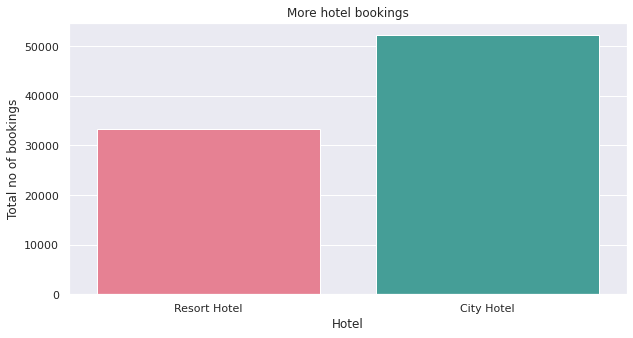

In [ ]:

# Analysis
# Q-1 Lets find out which hotel had more no of bookings
plt.rcParams['figure.figsize'] =[10,5]
sns.countplot(Df_copy['hotel'],palette='husl')
plt.title('More hotel bookings')
plt.ylabel("Total no of bookings")
plt.xlabel('Hotel')
plt.show

**As we can see clearly the city hotel has more number of bookings than resort hotel.**



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show(*args, **kw)>

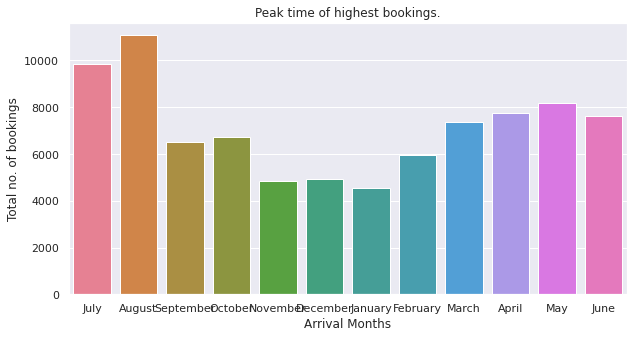

In [ ]:
# Q2 What is the peak time of hotel bookings in both hotel combined?plt.rcParams['figure.figsize'] =[10,5]
sns.countplot(Df_copy['arrival_date_month'],palette='husl')
plt.title('Peak time of highest bookings.')
plt.ylabel("Total no. of bookings")
plt.xlabel('Arrival Months')
plt.show


**We tried to find out which month has more number of bookings in both hotel combined and and we found that in August number of booking is highest.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show(*args, **kw)>

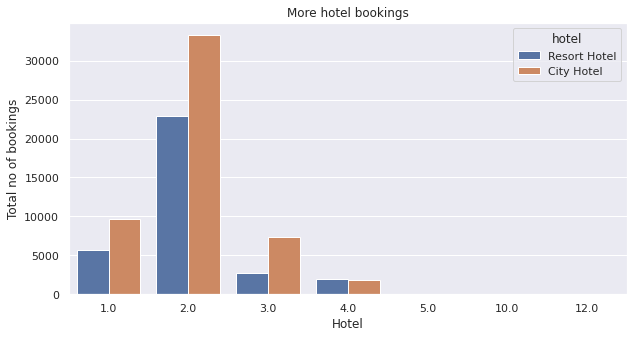

In [ ]:
# Q3-|We will find out which hotel had more no of total guests as per hotel type.
plt.rcParams['figure.figsize'] =[10,5]
sns.countplot(Df_copy['Total_guests'],hue='hotel',data=Df_copy)
plt.title('More hotel bookings')
plt.ylabel("Total no of bookings")
plt.xlabel('Hotel')
plt.show

**As shown in above chart  City hotel has more number of guests.**

Text(0, 0.5, 'Reservation count')

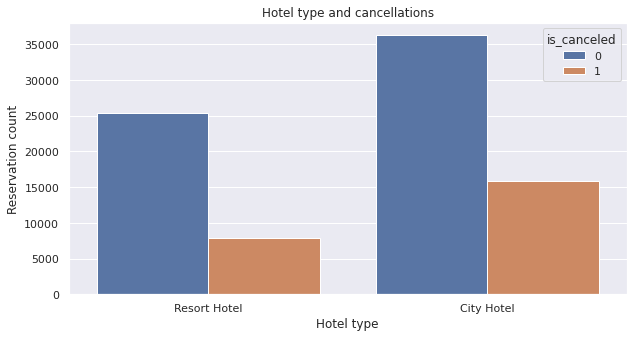

In [ ]:
# Q4- We will find out which type of Hotel had actual customers and which hotel is more cancelled.
sns.set(rc={'figure.figsize':(10,5)})
graph=sns.countplot(x='hotel', hue='is_canceled', data=Df_copy)
graph.set(title= 'Hotel type and cancellations')
graph.set_xlabel('Hotel type')
graph.set_ylabel('Reservation count')

**As we can see the above analysis and find out that Resort hotel  has less no. of cancellation and City Hotel has more number of cancellation thus we can conclude that Resort hotel has more no. of actual customers.**

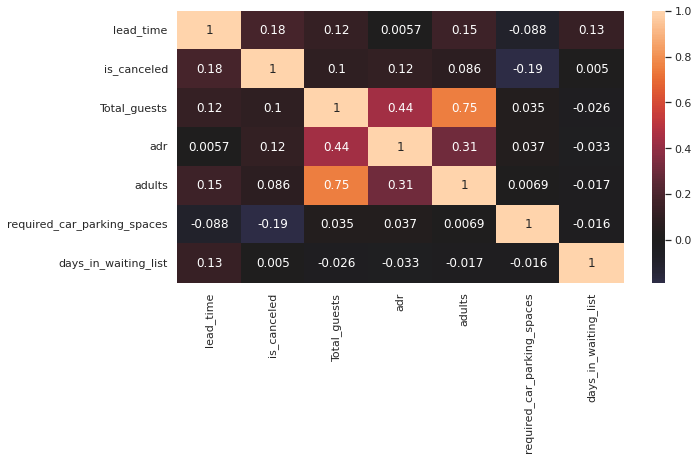

In [ ]:
# Lets see the correlation between different colums of numerical values in our analysis.

Df_copy1_Df= Df_copy[['lead_time','is_canceled','Total_guests','adr','adults','required_car_parking_spaces','days_in_waiting_list']]
plt.figure(figsize=(10,5))
sns.heatmap(Df_copy1_Df.corr(),annot=True,center=0)


**From the above heatmap, below conclusions can be made.**                          
1-Tourists  who is having high lead time they don't cancel their bookings very often as they have slight correlation of 0.18.                                  
2-Tourists who is staying for long time they don't have any problems for parking spacesas they have correlation of -0.008.                       
3-Total guests who have booked the hotel are adults mostly.
                          

Text(20.200000000000003, 0.5, 'Guest count')

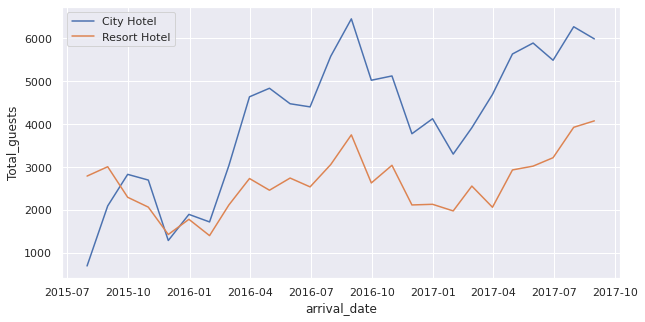

In [ ]:
# Q5 we will find out the lineplot of no of guests arrived in hotel per month

sns.set(rc={'figure.figsize':(10,5)})
fig, ax= plt.subplots()
sns.lineplot(data= Df_copy[Df_copy['hotel']=='City Hotel'].groupby(pd.Grouper(key="arrival_date",axis=0,freq='M')).sum().reset_index(), x="arrival_date", y="Total_guests", ax=ax, label= 'City Hotel')
sns.lineplot(data= Df_copy[Df_copy['hotel']=='Resort Hotel'].groupby(pd.Grouper(key="arrival_date",axis=0,freq='M')).sum().reset_index(), x="arrival_date", y="Total_guests", ax=ax, label ='Resort Hotel')

graph.set(title= 'No. of guests arrived every mongth in hotels')
graph.set_xlabel('Month')
graph.set_ylabel('Guest count')

**We can notice that:         

1-Number of guests coming to the city hotel is twice of that resort hotel, though graphs shows both hotels have resemblance  in their trends, and the no. of guests plunged to very low in January.

2-No. of guests are more between July and September.

**Conclusions:**

1-The city hotel has more number of bookings than resort hotel.**    
2-City hotel has more number of guests.    
3-Number of guests coming to the city hotel is twice of that resort hotel.   
4-No. of guests are more between July and September in both hotels.    
5-Tourists who is staying for long time they don't have any problems for parking spacesas they have correlation of -0.008.                       
6-Total guests who have booked the hotel are adults mostly.

**References:**

1-AlmaBetter:
https://grow.almabetter.com/my-dashboard.     
2-Matplotlib:
https://matplotlib.org/.    
3- Sea born:  https://seaborn.pydata.org/